In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs) ## convolution with kernel size 3x3, conducted for 32 times
x = layers.MaxPooling2D(pool_size=2)(x) ## max pooling with size 2x2 (and stride 2)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) ## convert data point from multiple matrices to a single vector
x = layers.Dense(64, activation="relu")(x) ## a fully connected layer
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 41s 42ms/step - loss: 0.1531 - accuracy: 0.9521
Epoch 2/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0433 - accuracy: 0.9868
Epoch 3/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0294 - accuracy: 0.9909
Epoch 4/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0224 - accuracy: 0.9932
Epoch 5/5
938/938 [==============================] - 40s 42ms/step - loss: 0.0167 - accuracy: 0.9943


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}") ## keep three digits after the decimal

313/313 [==============================] - 3s 11ms/step - loss: 0.0299 - accuracy: 0.9922
Test accuracy: 0.992


Because of the usage of stochastic method, the test accuracy from your run can be a little bit different from the above number.

While our previous analysis with fully-connected network had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.2%: we decreased our error rate by 68% (relative).

In [ ]:
## One can add weight decay and dropout as in multi-layer neuron networks

from tensorflow.keras import regularizers ## you need to import regularizers first

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(inputs) ## add weight decay on convolution layer
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) ## convert data point from multiple matrices to a single vector
x = layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x) ## add weight decay on fully connected layer
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385

In principle, one can add dropout in convolution as well, but this is NOT common in practice.

The regularization cannot be added to pooling layer (why?). The following code will return an error message.

x = layers.MaxPooling2D(pool_size=2, kernel_regularizer=regularizers.l2(0.001))(x)

------------------------------------------------------------------------------






A comprehensive example of applying CNN on a small size dataset for image classification

In [ ]:
## Download cat vs dog data from Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lias0624","key":"0597d6021d750bf03103f32979f9c22f"}'}


Kaggle makes available an easy-to-use API to programmatically download Kaggle-hosted datasets. Access to the API is restricted to Kaggle users, so you first need to authenticate yourself. The kaggle package will look for your login credentials in a JSON file located at ~/.kaggle/kaggle.json.

First, you need to create a Kaggle API key and download it to your local machine. Just navigate to the Kaggle website in a web browser, log in, and go to the My Account page. In your account settings, you’ll find an API section. Clicking the Create New API Token button will generate a kaggle.json key file and will download it to your machine.
Second, go to your Colab notebook, and upload the API’s key JSON file to your Colab session by running the above code. When you run this cell, you will see a Choose Files button appear. Click it and select the kaggle.json file you just downloaded. This uploads the file to the local Colab run-time.


In [ ]:
## create a folder to store the Kaggle key file
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json ## this line makes sure only you can read the file (for security)

In [ ]:
## download and unzip the dataset
!kaggle competitions download -c dogs-vs-cats
!unzip -qq train.zip

 96% 261M/271M [00:02<00:00, 146MB/s]
100% 271M/271M [00:02<00:00, 126MB/s]
100% 541M/543M [00:03<00:00, 170MB/s]
100% 543M/543M [00:03<00:00, 177MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 87.4MB/s]


In [ ]:
## split the whole dataset into training, validation and test sets
## create three folders, one for each set

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("test", start_index=1000, end_index=6000)

In [ ]:
## Data preprocessing
## We use `image_dataset_from_directory' to read images

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 10000 files belonging to 2 classes.


In [ ]:
## specify CNN architecture

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [ ]:
## specify model fitting configuration
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
## Fit the model and record model fittig process (for tuning purpose)
## This modeling fitting can take a long time

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 [==============================] - 95s 3s/step - loss: 0.7966 - accuracy: 0.5050 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 93s 3s/step - loss: 0.6946 - accuracy: 0.5220 - val_loss: 0.6911 - val_accuracy: 0.5910
Epoch 3/30
32/32 [==============================] - 94s 3s/step - loss: 0.7006 - accuracy: 0.5870 - val_loss: 0.7032 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 93s 3s/step - loss: 0.6903 - accuracy: 0.5370 - val_loss: 0.6857 - val_accuracy: 0.5410
Epoch 5/30
32/32 [==============================] - 93s 3s/step - loss: 0.6794 - accuracy: 0.5730 - val_loss: 0.7242 - val_accuracy: 0.5280
Epoch 6/30
32/32 [==============================] - 93s 3s/step - loss: 0.6840 - accuracy: 0.6220 - val_loss: 0.6516 - val_accuracy: 0.6130
Epoch 7/30
32/32 [==============================] - 93s 3s/step - loss: 0.6045 - accuracy: 0.6840 - val_loss: 1.1343 - val_accuracy: 0.5050
Epoch 8/30
32/32 [==

We use a ModelCheckpoint callback to save the model after each epoch. We’ll configure it with the path specifying where to save the file, as well as the arguments save_best_only=True and monitor="val_loss": they tell the callback to only save a new file (overwriting any previous one) when the current value of the val_loss metric is lower than at any previous time during training. This guarantees that your saved file will always contain the state of the model corresponding to its best- performing training epoch, in terms of its performance on the validation data. As a result, we won’t have to retrain a new model for a lower number of epochs if we start overfitting: we can just reload our saved file.

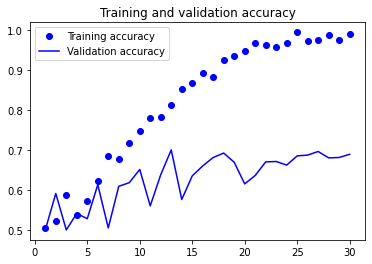

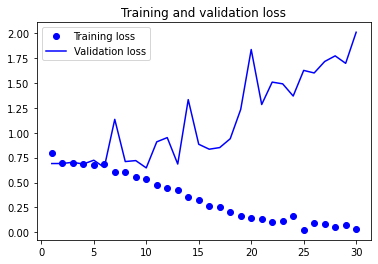

In [ ]:
## plot the model accuracies over epocs
## we can see the model starts to overfit the data from certain epoch

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
## Evaluating the model on the test set

test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}") ## keep 3 decimals after the point

313/313 [==============================] - 206s 657ms/step - loss: 0.6692 - accuracy: 0.6455
Test accuracy: 0.646


-----------------------------------------------------------------------------

The following codes can be very time consuming

-----------------------------------------------------------------------------


Use data augmentation to improve the model performance

In [ ]:
## Define a data augmentation stage to add to an image model
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

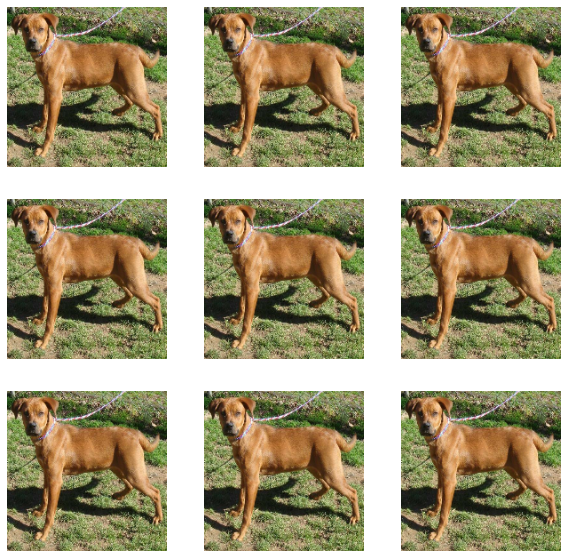

In [ ]:
## Displaying some randomly augmented training images
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
## specify a CNN including image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs) ## data augmentation
x = layers.Rescaling(1./255)(x) ## standardize each image (all pixel values are between 0 and 1)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x) ## add a dropout on fully connected layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
## fit the regularized CNN

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 [==============================] - 98s 3s/step - loss: 0.6990 - accuracy: 0.4940 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 98s 3s/step - loss: 0.6934 - accuracy: 0.5160 - val_loss: 0.6923 - val_accuracy: 0.5160
Epoch 3/30
32/32 [==============================] - 98s 3s/step - loss: 0.6995 - accuracy: 0.5520 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 98s 3s/step - loss: 0.7182 - accuracy: 0.5440 - val_loss: 0.6799 - val_accuracy: 0.5900
Epoch 5/30
32/32 [==============================] - 97s 3s/step - loss: 0.6811 - accuracy: 0.5750 - val_loss: 0.6753 - val_accuracy: 0.5420
Epoch 6/30
32/32 [==============================] - 97s 3s/step - loss: 0.6810 - accuracy: 0.5850 - val_loss: 0.6752 - val_accuracy: 0.5720
Epoch 7/30
32/32 [==============================] - 97s 3s/step - loss: 0.6785 - accuracy: 0.6030 - val_loss: 0.7665 - val_accuracy: 0.5100
Epoch 8/30
32/32 [==

In [ ]:
## evaluate the model on test set

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 201s 641ms/step - loss: 0.5573 - accuracy: 0.7271
Test accuracy: 0.727


---------------------------------------------------------------------------

Use a pretrained model to improve CNN performance

In [ ]:
## Instantiating the VGG16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
## Extract VGG16 features (without data augmentation) and corresponding labels

import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(1000, 5, 5, 512)

In [ ]:
## Construct and fit a CNN with fully connected layer built on the extracted features

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
32/32 [==============================] - 2s 59ms/step - loss: 24.8405 - accuracy: 0.9090 - val_loss: 10.3643 - val_accuracy: 0.9290
Epoch 2/20
32/32 [==============================] - 2s 48ms/step - loss: 3.7103 - accuracy: 0.9720 - val_loss: 9.9025 - val_accuracy: 0.9430
Epoch 3/20
32/32 [==============================] - 1s 45ms/step - loss: 2.0947 - accuracy: 0.9860 - val_loss: 14.5914 - val_accuracy: 0.9350
Epoch 4/20
32/32 [==============================] - 2s 49ms/step - loss: 1.1051 - accuracy: 0.9920 - val_loss: 6.6084 - val_accuracy: 0.9620
Epoch 5/20
32/32 [==============================] - 2s 50ms/step - loss: 0.8682 - accuracy: 0.9910 - val_loss: 4.8502 - val_accuracy: 0.9680
Epoch 6/20
32/32 [==============================] - 2s 47ms/step - loss: 0.2141 - accuracy: 0.9960 - val_loss: 9.7496 - val_accuracy: 0.9570
Epoch 7/20
32/32 [==============================] - 1s 46ms/step - loss: 0.3132 - accuracy: 0.9950 - val_loss: 7.5605 - val_accuracy: 0.9590
Epoch 8/20

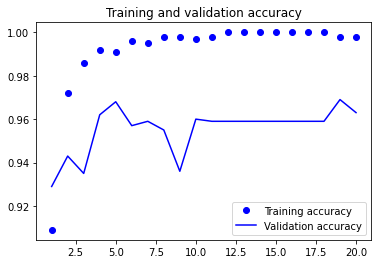

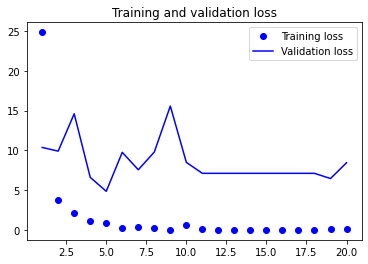

In [ ]:
## Show the model fitting results

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
## Use data augmentation together with feature extraction

## Instantiating and freezing the VGG16 convolutional base
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
## Print the list of trainable weights before and after freezing

conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [ ]:
## Add a data augmentation in CNN

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
## fit the model

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
32/32 [==============================] - 648s 21s/step - loss: 6.9506 - accuracy: 0.9410 - val_loss: 4.7081 - val_accuracy: 0.9630
Epoch 2/10
32/32 [==============================] - 648s 21s/step - loss: 5.7652 - accuracy: 0.9580 - val_loss: 5.0096 - val_accuracy: 0.9620
Epoch 3/10
32/32 [==============================] - 647s 21s/step - loss: 7.2766 - accuracy: 0.9480 - val_loss: 5.4063 - val_accuracy: 0.9660
Epoch 4/10
32/32 [==============================] - 647s 21s/step - loss: 4.6540 - accuracy: 0.9640 - val_loss: 8.4866 - val_accuracy: 0.9550
Epoch 5/10
32/32 [==============================] - 645s 20s/step - loss: 3.2105 - accuracy: 0.9710 - val_loss: 7.4742 - val_accuracy: 0.9600
Epoch 6/10
32/32 [==============================] - 647s 21s/step - loss: 3.3408 - accuracy: 0.9740 - val_loss: 8.8426 - val_accuracy: 0.9580
Epoch 7/10
32/32 [==============================] - 646s 20s/step - loss: 2.2342 - accuracy: 0.9820 - val_loss: 5.5220 - val_accuracy: 0.9690
Epoch 

In [ ]:
## evaluate on the test set

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3221s 10s/step - loss: 4.3479 - accuracy: 0.9688
Test accuracy: 0.969


------------------------------------------------------------------------------
Fine-tuning a pre-trained model


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
## Freeze all layers until the fourth from the last
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
## Fine-tune the model
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
32/32 [==============================] - 710s 22s/step - loss: 1.4862 - accuracy: 0.9850 - val_loss: 5.2676 - val_accuracy: 0.9680
Epoch 2/10
32/32 [==============================] - 707s 22s/step - loss: 0.9068 - accuracy: 0.9880 - val_loss: 6.2908 - val_accuracy: 0.9700
Epoch 3/10
32/32 [==============================] - 709s 22s/step - loss: 1.3079 - accuracy: 0.9880 - val_loss: 5.0529 - val_accuracy: 0.9670
Epoch 4/10
32/32 [==============================] - 708s 22s/step - loss: 1.0462 - accuracy: 0.9880 - val_loss: 4.9228 - val_accuracy: 0.9670
Epoch 5/10
32/32 [==============================] - 708s 22s/step - loss: 0.4683 - accuracy: 0.9930 - val_loss: 4.7233 - val_accuracy: 0.9640
Epoch 6/10
32/32 [==============================] - 708s 22s/step - loss: 0.5734 - accuracy: 0.9910 - val_loss: 4.3572 - val_accuracy: 0.9710
Epoch 7/10
32/32 [==============================] - 706s 22s/step - loss: 0.6101 - accuracy: 0.9890 - val_loss: 4.8059 - val_accuracy: 0.9740
Epoch 

In [ ]:
## Evaluate the model on test set
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3218s 10s/step - loss: 4.2293 - accuracy: 0.9736
Test accuracy: 0.974
